In [1]:
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import pickle
import math
import sys
sys.path.append('../..')
# from myms import *
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import time 
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import make_interp_spline
import string

In [2]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [3]:
dirname = "../result/"

In [4]:
mean_dvalues = []
dvalues_max = []
dvalues_min = []
cycle_numbers = range(1,14)
lengths = []
for cycle_number in cycle_numbers:
    filelists = []
    for i in range(1,13):
        filelists.append('CsoDIAq-file'+str(i)+'_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_'+'%02d'%(i)+'_correctedNoFilter_withFeature_'+str(cycle_number)+'cycle_pvalue.csv')

    Dvalues_12 = []
    for k in range(len(filelists)):
        filename = filelists[k]
        df = pd.read_csv(os.path.join(dirname,filename))
        df['protein'] = df['peptide'].apply(peptide_type)

        sample = df[df['protein']=='SAMPLE']
        trap = df[df['protein']=='TRAP']
        decoy = df[df['protein']=='DECOY_null']
        y_data = trap['p-value'].values
        x_data = decoy['p-value'].values
#         print(len(y_data))
#         print(len(x_data))
        Dvalue,_ = stats.kstest(y_data,stats.uniform.cdf,N=len(y_data))
        #print(len(y_data))
        lengths.append(len(y_data))
        Dvalues_12.append(Dvalue)
    mean_dvalues.append(np.mean(Dvalues_12))
    dvalues_max.append(np.max(Dvalues_12))
    dvalues_min.append(np.min(Dvalues_12))


In [5]:
np.mean(lengths)

28485.647435897437

In [6]:
mean_dvalues = np.array(mean_dvalues)
dvalues_max = np.array(dvalues_max)
dvalues_min = np.array(dvalues_min)

In [7]:
print(mean_dvalues)

[0.0182582  0.01537662 0.0138733  0.01332803 0.01265635 0.01287862
 0.01212607 0.01226768 0.01223755 0.01173892 0.0112582  0.01182795
 0.01205921]


In [8]:
print(mean_dvalues)

[0.0182582  0.01537662 0.0138733  0.01332803 0.01265635 0.01287862
 0.01212607 0.01226768 0.01223755 0.01173892 0.0112582  0.01182795
 0.01205921]


In [9]:
len(y_data)

34387

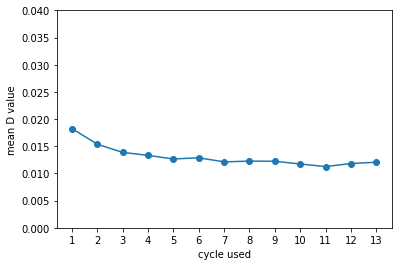

In [10]:
plt.plot(np.linspace(1,13,13),mean_dvalues)
plt.scatter(np.linspace(1,13,13),mean_dvalues)
plt.xlabel('cycle used')
plt.ylabel('mean D value')
new_ticks = np.linspace(1,13,13)
plt.xticks(new_ticks)
plt.ylim(0,0.04)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=7)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [11]:
print('over')

over


In [12]:
len(mean_dvalues)

13

34387
67356


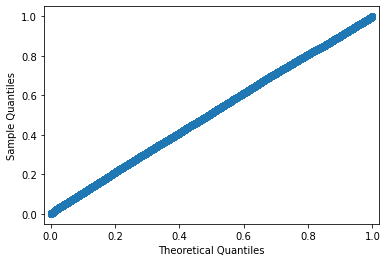

KstestResult(statistic=0.013131341531564256, pvalue=1.4022706501090648e-05)


In [13]:
dirname = "../result/"
cycle_number = 13


filelists = []
for i in range(1,13):
    filelists.append('CsoDIAq-file'+str(i)+'_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_'+'%02d'%(i)+'_correctedNoFilter_withFeature_'+str(cycle_number)+'cycle_pvalue.csv')


def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'


for k in range(len(filelists)):
    filename = filelists[k]
    df = pd.read_csv(os.path.join(dirname,filename))
    df['protein'] = df['peptide'].apply(peptide_type)


sample = df[df['protein']=='SAMPLE']
trap = df[df['protein']=='TRAP']
decoy = df[df['protein']=='DECOY_null']


import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
y_data = trap['p-value'].values
x_data = decoy['p-value'].values
print(len(y_data))
print(len(x_data))


fig, ax = plt.subplots()
sm.qqplot(y_data, stats.uniform,ax=ax)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.show()

print(stats.kstest(y_data,stats.uniform.cdf)) # N=len(y_data)

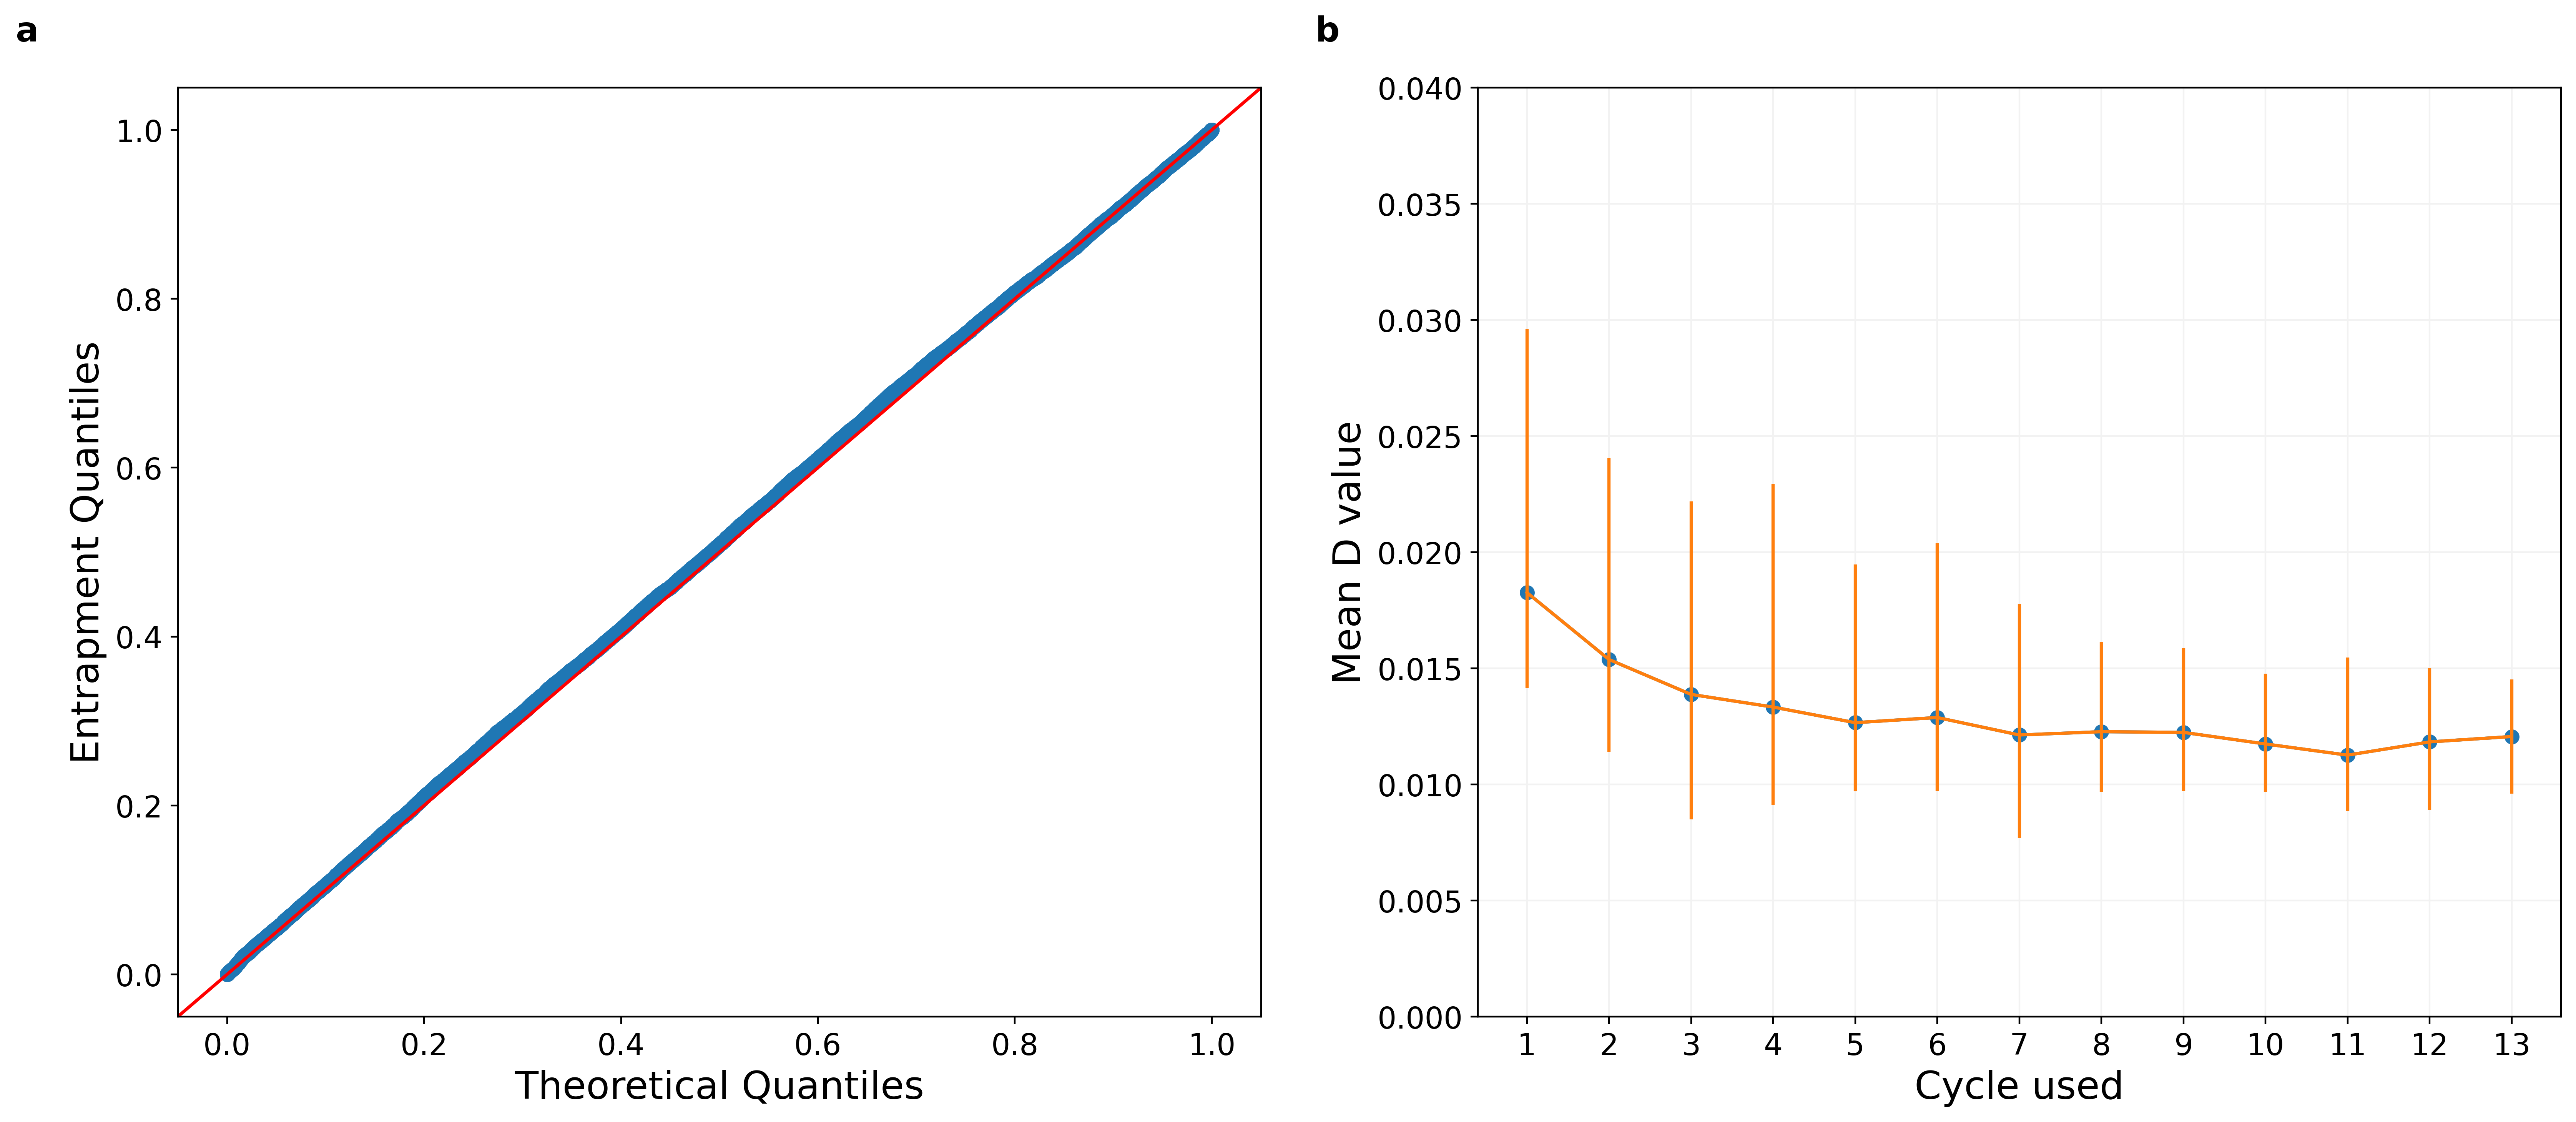

In [14]:
fig, axs = plt.subplots(1,2,figsize=(20,8),dpi=400)
sm.qqplot(y_data, stats.uniform,ax=axs[0],fit=True, line="45")
# # axs[0].spines['right'].set_visible(False)
# # axs[0].spines['top'].set_visible(False)
axs[0].set_xlabel('Theoretical Quantiles',fontsize=18)
axs[0].set_ylabel('Entrapment Quantiles',fontsize=18)
axs[0].tick_params(labelsize=14)
# a = y_data
# b = x_data
# percs = np.linspace(0,100,25)
# qn_a = np.percentile(a, percs)
# qn_b = np.percentile(b, percs)
# axs[0].plot(qn_a,qn_b, ls="", marker="o")
# x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
# axs[0].plot(x,x, color="k", ls="--")


axs[1].plot(np.linspace(1,13,13),mean_dvalues)
axs[1].errorbar(np.linspace(1,13,13),mean_dvalues,yerr=[mean_dvalues-dvalues_min,dvalues_max-mean_dvalues])
axs[1].scatter(np.linspace(1,13,13),mean_dvalues)
axs[1].set_xlabel('Cycle used',fontsize=18)
axs[1].set_ylabel('Mean D value',fontsize=18)
axs[1].tick_params(labelsize=14)
new_ticks = np.linspace(1,13,13)
axs[1].set_xticks(new_ticks)
axs[1].set_ylim(0,0.04)

plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')

axs = axs.flat
for n, ax in enumerate(axs):
    # ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.15, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')
plt.savefig('fig8.jpg')

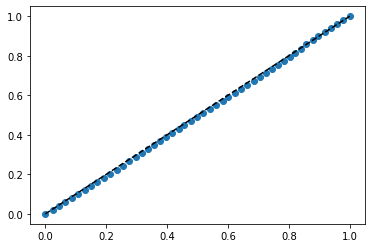

In [15]:
import numpy as np
import matplotlib.pyplot as plt

a = y_data
b = x_data

percs = np.linspace(0,100,)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()